In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def parse_dotted_date(x):
    return datetime.strptime(x, '%d.%m.%Y')

In [3]:
df = pd.read_csv('train.csv', parse_dates=['Date'], index_col='Date', date_parser=parse_dotted_date)
df['y'] = df['ACTUAL']
df['t'] = df['Temp']
df.drop(['Saturday', 'Sunday', 'ACTUAL', 'Temp'], 1, inplace=True)
df.head()

ID  tsID         y     t
Date                                
2010-01-01   1     4  35489.95  -0.9
2010-01-02   2     4  35413.59  -0.1
2010-01-03   3     4  34802.67  -3.9
2010-01-04   4     4  36003.84 -13.7
2010-01-05   5     4  37622.96 -16.9

In [4]:
def get_kth_series(k):
    return df[df['tsID']==k].loc[:, ['ID','y','t']]

In [5]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100.

In [11]:
def predict_kth_series(k):
    sk = get_kth_series(k)
    sk = sk.asfreq(freq='D')
    
    future = sk[-30:]
    # given
    tsk = sk['y'][:-30]
    tk = sk['t'][:-30]
#     # train, test
#     tsk_train, tsk_test = tsk[:-30], tsk[-30:]
#     tk_train, tk_test = tk[:-30], tk[-30:]
    
#     model = SARIMAX(tsk_train, tk_train, order=(1,0,1)).fit()
    model = SARIMAX(tsk, tk, order=(1,0,1)).fit()
    
#     tsk_train.plot()
#     model.fittedvalues.plot()
#     plt.show()
    
    frc_range = pd.date_range(tsk.index[-1], periods=31, freq='D')
    predicted = pd.DataFrame(
        model.predict(start=frc_range[0], end=frc_range[-1], exog=future['t'].values.reshape((30,1)))[1:],
        index=future['t'].index
    )
    
    return predicted
#     tsk_test.plot()
#     predicted.plot()
#     plt.show()

#     return mape(predicted.values, tsk_test.values)

In [8]:
# mapes = np.array([predict_kth_series(k) for k in range(1,23)])

/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/numpy/linalg/linalg.py:1574: RuntimeWarning: inva

In [9]:
# print(mapes)

[  5.26921506   3.84674736   1.60567932   5.52222955   5.73224754
  10.01309838   6.1233638   12.06650055   8.27156558  10.91925558
   4.99841569   4.64987686   1.84775787   2.08131554   2.88541861
   4.08573382   5.33689865  11.21837071   8.45704      2.88237825
   4.68193078   3.72716501]


In [12]:
answer = pd.DataFrame()
for k in range(1, 23):
    answer = answer.append(predict_kth_series(k))    

/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning

In [14]:
# save forecast to disk for further submission
answer.to_csv('result.csv', index=False)

In [15]:
pd.read_csv('result.csv')

0
0    107535.275869
1    107533.008059
2    107523.968705
3    107517.186532
4    107517.175904
5    107528.451184
6    107526.183374
7    107526.172746
8    107530.676481
9    107537.437398
10   107526.140862
11   107517.101507
12   107526.119606
13   107530.623341
14   107539.641439
15   107541.887992
16   107528.334275
17   107537.352373
18   107539.598927
19   107530.559572
20   107521.520218
21   107514.738045
22   107516.984599
23   107514.716789
24   107519.220524
25   107516.952715
26   107523.713631
27   107530.474548
28   107532.721102
29   107523.681747
..             ...
630  423040.283453
631  421662.283123
632  428781.902785
633  432226.875964
634  430619.210228
635  429241.209898
636  429011.536593
637  431308.182746
638  429011.520795
639  430619.170732
640  432915.816884
641  427863.170071
642  421202.865421
643  423499.511573
644  411327.237199
645  400303.289850
646  402140.605192
647  403288.924319
648  405126.239661
649  395709.950149
650  391116.634145
651  403748.223532
652  418217.136161
653  429011.402306
654  431078.383053
655  416839.120032
656  388590.267293
657  369528.030762
658  385834.266632
659  401221.840881

[660 rows x 1 columns]

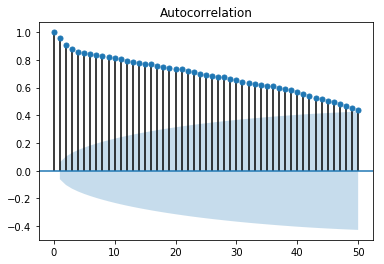

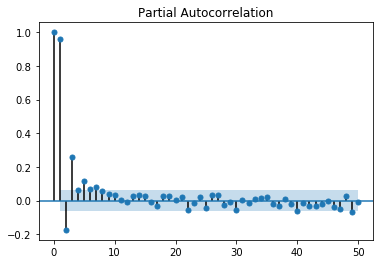

In [275]:
# sm.graphics.tsa.plot_acf(tk, lags=50)
# sm.graphics.tsa.plot_pacf(tk, lags=50)
# plt.show()

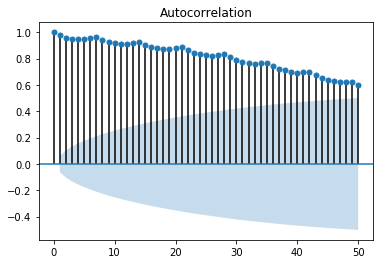

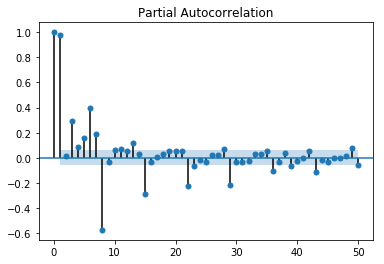

In [305]:
# sm.graphics.tsa.plot_acf(tsk, lags=50)
# sm.graphics.tsa.plot_pacf(tsk, lags=50)
# plt.show()

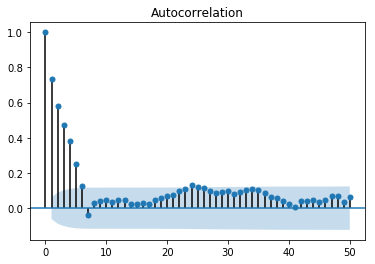

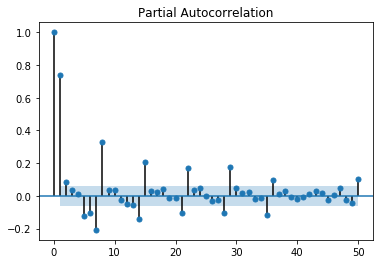

In [306]:
# s = 7
# sdiff_ts1 = (ts1 - ts1.shift(s))[s:]
# sm.graphics.tsa.plot_acf(sdiff_ts1, lags=50)
# sm.graphics.tsa.plot_pacf(sdiff_ts1, lags=50)
# plt.show()

(-5.1432899907715628,
 1.1465115707402855e-05,
 21,
 1006,
 {'1%': -3.436866962597422,
  '10%': -2.5683020002450507,
  '5%': -2.8644172846037028},
 18616.78052778545)

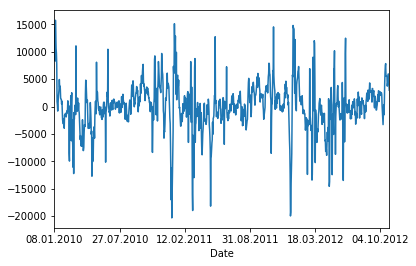

In [309]:
# sdiff_ts1.plot()
# sm.tsa.adfuller(sdiff_ts1)

In [56]:
# arima_tune(ts1, range(8), [1], range(8))

/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

((6, 1, 7), 19034.949738426578)

In [57]:
# best_model = ARIMA(ts1, (6, 1, 7)).fit()

/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


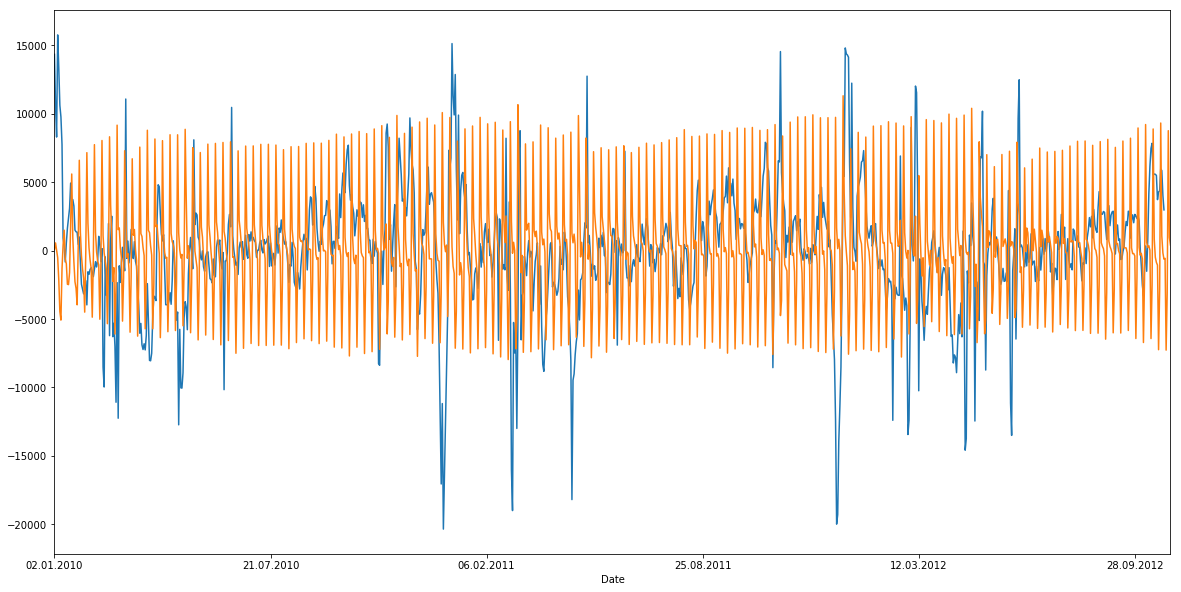

In [61]:
# sdiff_ts1.plot(figsize=(20, 10))
# best_model.fittedvalues.plot(figsize=(20, 10))
# plt.show()

<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #3: ARIMAX, Compositions

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

<span style="color:red; font-size: 14pt;"> DEADLINE: 10 October 2017 23:59:59 </span>

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 


<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

<Ответ>

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

<Ответ>

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>